In [1]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Read the text data
with open('dataset.txt', 'r', encoding='utf-8') as file:
    text = file.read()

# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])
total_words = len(tokenizer.word_index) + 1

# Create input sequences and labels
sequences = []
for line in text.split('\n'):
    encoded = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(encoded)):
        sequences.append(encoded[:i+1])

# Pad sequences for equal length
max_seq_length = max([len(seq) for seq in sequences])
sequences = pad_sequences(sequences, maxlen=max_seq_length, padding='pre')

# Separate input and output
X, y = sequences[:, :-1], sequences[:, -1]
y = np.array(y)


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Build the model
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_seq_length-1))
model.add(LSTM(150))
model.add(Dense(total_words, activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X, y, epochs=5, verbose=1)


Epoch 1/5
3176/3176 [==============================] - 173s 54ms/step - loss: 6.3139 - accuracy: 0.0709
Epoch 2/5
3176/3176 [==============================] - 165s 52ms/step - loss: 5.6113 - accuracy: 0.1173
Epoch 3/5
3176/3176 [==============================] - 153s 48ms/step - loss: 5.1946 - accuracy: 0.1441
Epoch 4/5
3176/3176 [==============================] - 167s 53ms/step - loss: 4.8348 - accuracy: 0.1665
Epoch 5/5
3176/3176 [==============================] - 178s 56ms/step - loss: 4.5107 - accuracy: 0.1869


1/1 [==============================] - 0s 16ms/step


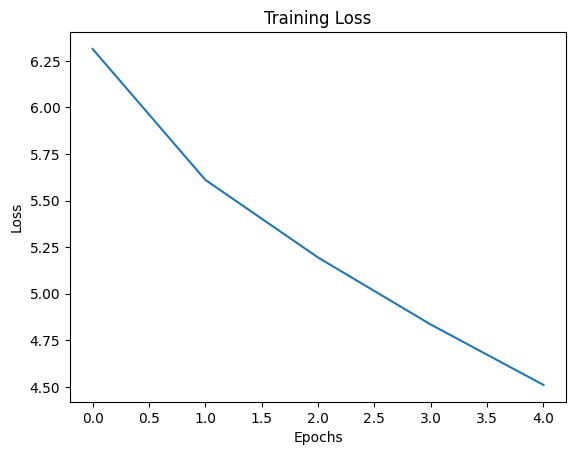

The next word generated is:  He was pacing in the room and i saw that he had been


In [3]:
import matplotlib.pyplot as plt

# Function to generate text
def generate_text(seed_text, next_words, model, tokenizer, max_seq_length):
    for _ in range(next_words):
        encoded = tokenizer.texts_to_sequences([seed_text])[0]
        encoded = pad_sequences([encoded], maxlen=max_seq_length-1, padding='pre')
        predicted_word_index = np.argmax(model.predict(encoded), axis=-1)
        predicted_word = tokenizer.index_word[predicted_word_index[0]]
        seed_text += " " + predicted_word
    return seed_text

# Generate text
generated_text = generate_text("He was pacing", 10, model, tokenizer, max_seq_length)

# Plot training history
plt.plot(history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()
print('The next word generated is: ',generated_text)